# COPY

In [52]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import scienceplots

plt.style.use(['science', 'no-latex'])

from collections import defaultdict

In [33]:
df = pandas.read_csv("Output/tags_ask_ubuntu_dataframe.csv")

In [34]:
df

,UPHEC-2,UPHEC-3,UPHEC-4,UPHEC-5,HEC-2unif,HEC-3unif,HEC-4unif,HEC-5unif
0,0.000830,0.000697,0.000584,0.000532,0.001732,0.001297,0.001102,0.001049
1,0.001423,0.001032,0.000816,0.000683,0.001214,0.000900,0.000622,0.000604
2,0.002054,0.001282,0.000963,0.000793,0.002811,0.001778,0.001147,0.000838
3,0.000357,0.000391,0.000405,0.000379,0.004494,0.002335,0.001402,0.001039
4,0.002115,0.001289,0.001037,0.000936,0.000262,0.000387,0.000422,0.000357
...,...,...,...,...,...,...,...,...
3016,0.000025,0.000040,0.000105,0.000132,0.000012,0.000061,0.000000,0.000000
3017,0.000028,0.000081,0.000109,0.000122,0.000000,0.000000,0.000073,0.000000
3018,0.000023,0.000040,0.000110,0.000130,0.000000,0.000030,0.000000,0.000000
3019,0.000031,0.000084,0.000112,0.000128,0.000000,0.000000,0.000074,0.000000


In [35]:
 5 % 3

2

In [36]:
dictlist = df.to_dict()

In [37]:
newdict = {}
for key, val in dictlist.items():
    if "UP" in key:
        
        shiftedcent = {}
        for node in val.keys():
            shiftedcent[node] = val[(node-1) % len(df)]
        
        newdict[key] = shiftedcent
        
    else:
        newdict[key] = val

In [38]:
df = pandas.DataFrame(newdict)
df

,UPHEC-2,UPHEC-3,UPHEC-4,UPHEC-5,HEC-2unif,HEC-3unif,HEC-4unif,HEC-5unif
0,0.001270,0.002172,0.001826,0.000000,0.001732,0.001297,0.001102,0.001049
1,0.000830,0.000697,0.000584,0.000532,0.001214,0.000900,0.000622,0.000604
2,0.001423,0.001032,0.000816,0.000683,0.002811,0.001778,0.001147,0.000838
3,0.002054,0.001282,0.000963,0.000793,0.004494,0.002335,0.001402,0.001039
4,0.000357,0.000391,0.000405,0.000379,0.000262,0.000387,0.000422,0.000357
...,...,...,...,...,...,...,...,...
3016,0.000069,0.000131,0.000147,0.000153,0.000012,0.000061,0.000000,0.000000
3017,0.000025,0.000040,0.000105,0.000132,0.000000,0.000000,0.000073,0.000000
3018,0.000028,0.000081,0.000109,0.000122,0.000000,0.000030,0.000000,0.000000
3019,0.000023,0.000040,0.000110,0.000130,0.000000,0.000000,0.000074,0.000000


## Complete ranking

In [39]:
KT = np.zeros((len(df.columns),len(df.columns)))
for i, row in enumerate(df):
    for j, col in enumerate(df):
        KT[i,j] = scipy.stats.kendalltau(df[row],df[col]).statistic

In [40]:
np.min(KT)

0.5453920196877984

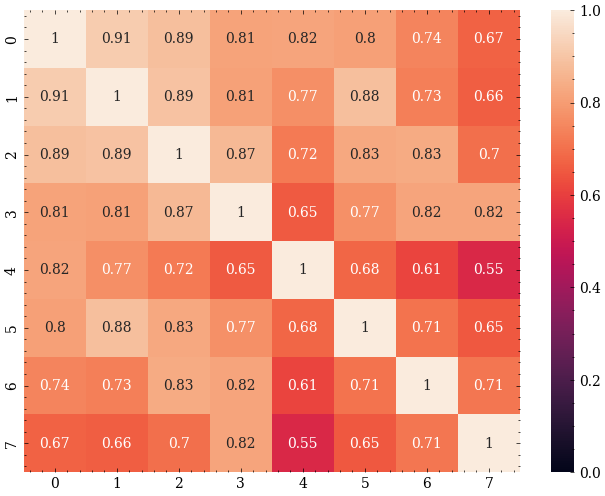

In [56]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax = sns.heatmap(KT, annot=True, vmin=0, vmax=1)

## Top-K ranking


In [42]:
## Top K nodes based on a centrality dictionary ##
def topK(cent, K=None, return_list=False):
    """
    Given a dictionary node-centrality score, return the top K ranking
    """

    if not K:
        K = len(cent)
    
    C = sorted(cent, key=cent.get, reverse=True)[:K]
    ranking = {key: cent[key] for key in C}
    
    if return_list:
        return C

    return ranking

In [43]:
dictlist = df.to_dict()

In [44]:
for key1, value1 in dictlist.items():
    print(key1, topK(value1,K=10).keys())

UPHEC-2 dict_keys([1729, 1163, 1738, 88, 159, 52, 8, 121, 152, 288])
UPHEC-3 dict_keys([0, 1729, 1163, 1738, 88, 52, 159, 8, 288, 121])
UPHEC-4 dict_keys([0, 1729, 1163, 88, 1738, 159, 121, 152, 8, 52])
UPHEC-5 dict_keys([1729, 88, 152, 121, 1163, 1738, 137, 159, 154, 136])
HEC-2unif dict_keys([1729, 1163, 1738, 52, 822, 3, 280, 8, 288, 1918])
HEC-3unif dict_keys([1729, 1163, 88, 1738, 52, 8, 288, 159, 280, 6])
HEC-4unif dict_keys([88, 1729, 1163, 152, 121, 137, 1738, 159, 136, 314])
HEC-5unif dict_keys([88, 152, 137, 121, 1729, 136, 154, 1738, 1163, 159])


In [45]:
KTtopK = defaultdict(list)

for key1, value1 in dictlist.items():
    
    for key2, value2 in dictlist.items():
        
        print(key1, key2)
        
        if key1 == key2:
            continue
        
        for k in range(1, len(df)):
                        
            topk1 = topK(value1, K=k)
            centrals2 = [value2[node] for node in topk1.keys()]
            
            KTtopK[key1 + " -> " + key2].append( scipy.stats.kendalltau(list(topk1.values()), centrals2).statistic )

UPHEC-2 UPHEC-2
UPHEC-2 UPHEC-3
UPHEC-2 UPHEC-4
UPHEC-2 UPHEC-5
UPHEC-2 HEC-2unif
UPHEC-2 HEC-3unif
UPHEC-2 HEC-4unif
UPHEC-2 HEC-5unif
UPHEC-3 UPHEC-2
UPHEC-3 UPHEC-3
UPHEC-3 UPHEC-4
UPHEC-3 UPHEC-5
UPHEC-3 HEC-2unif
UPHEC-3 HEC-3unif
UPHEC-3 HEC-4unif
UPHEC-3 HEC-5unif
UPHEC-4 UPHEC-2
UPHEC-4 UPHEC-3
UPHEC-4 UPHEC-4
UPHEC-4 UPHEC-5
UPHEC-4 HEC-2unif
UPHEC-4 HEC-3unif
UPHEC-4 HEC-4unif
UPHEC-4 HEC-5unif
UPHEC-5 UPHEC-2
UPHEC-5 UPHEC-3
UPHEC-5 UPHEC-4
UPHEC-5 UPHEC-5
UPHEC-5 HEC-2unif
UPHEC-5 HEC-3unif
UPHEC-5 HEC-4unif
UPHEC-5 HEC-5unif
HEC-2unif UPHEC-2
HEC-2unif UPHEC-3
HEC-2unif UPHEC-4
HEC-2unif UPHEC-5
HEC-2unif HEC-2unif
HEC-2unif HEC-3unif
HEC-2unif HEC-4unif
HEC-2unif HEC-5unif
HEC-3unif UPHEC-2
HEC-3unif UPHEC-3
HEC-3unif UPHEC-4
HEC-3unif UPHEC-5
HEC-3unif HEC-2unif
HEC-3unif HEC-3unif
HEC-3unif HEC-4unif
HEC-3unif HEC-5unif
HEC-4unif UPHEC-2
HEC-4unif UPHEC-3
HEC-4unif UPHEC-4
HEC-4unif UPHEC-5
HEC-4unif HEC-2unif
HEC-4unif HEC-3unif
HEC-4unif HEC-4unif
HEC-4unif HEC-5unif


In [46]:
for key, val in KTtopK.items():
    ax.plot(val, label=key)

In [84]:
# Colormap for the plots
cmap = plt.get_cmap('rainbow') #rainbow, hsv, viridis, cool

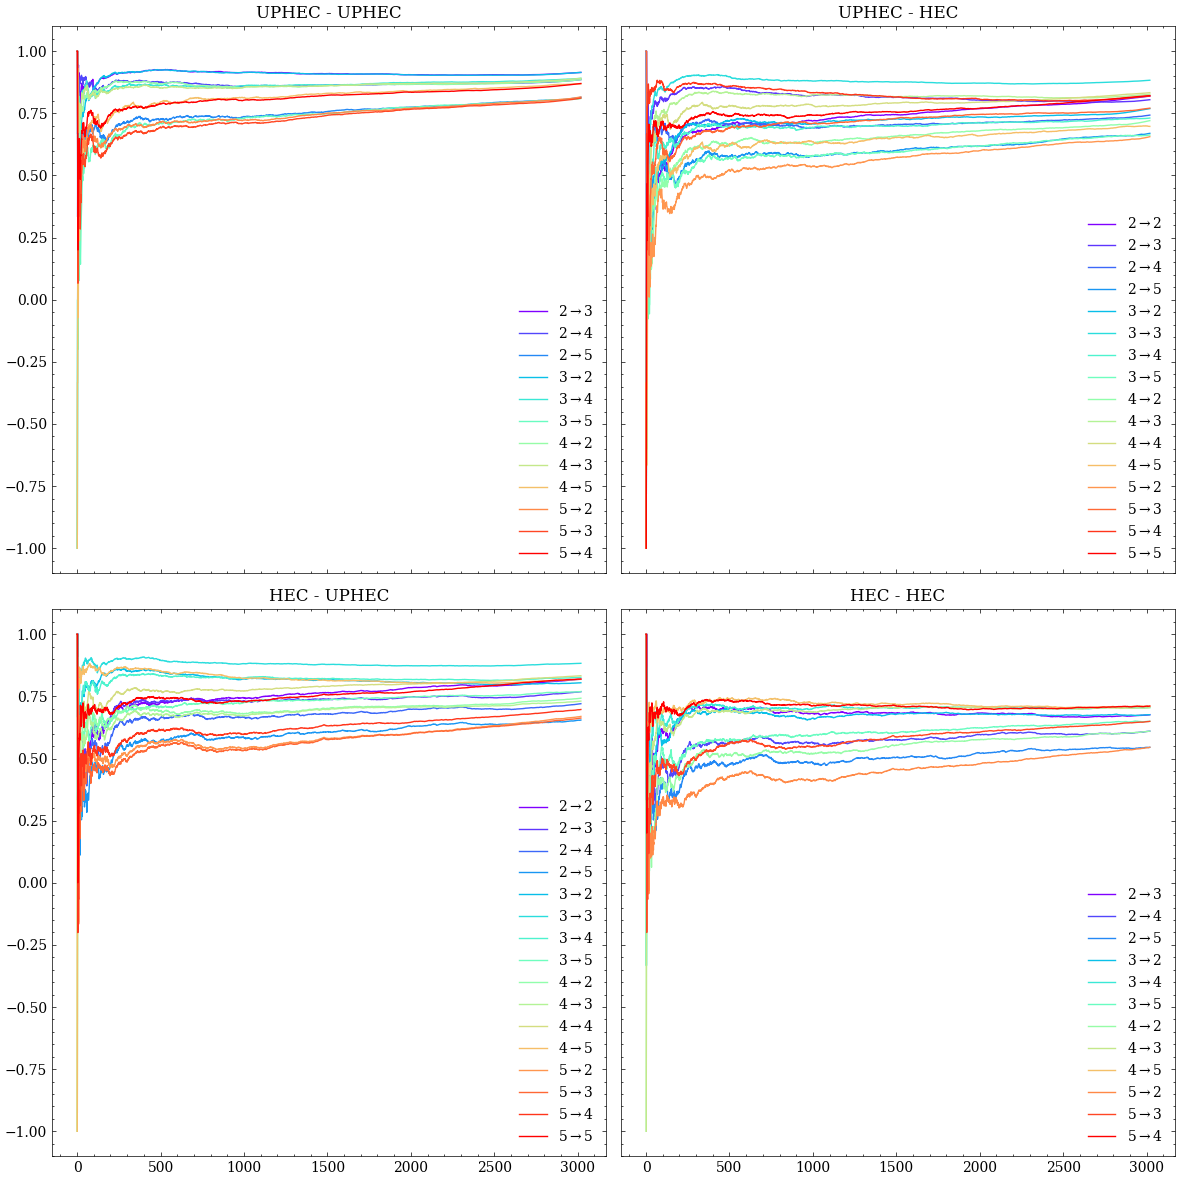

In [85]:
fig, ax = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

colorUU = iter(cmap(np.linspace(0, 1, 4*3)))
colorUH = iter(cmap(np.linspace(0, 1, 4*4)))
colorHU = iter(cmap(np.linspace(0, 1, 4*4)))
colorHH = iter(cmap(np.linspace(0, 1, 4*3)))

for key, val in KTtopK.items():
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        ax[0,0].plot(val, label=f"{key[6]}" + r"$\rightarrow$"+ f"{key[-1]}", color=next(colorUU))
        ax[0,0].set_title("UPHEC - UPHEC")
    
    elif "UP" in key[0:3]:
        
        ax[0,1].plot(val, label=f"{key[6]}" + r"$\rightarrow$"+ f"{key[-5]}", color=next(colorUH))
        ax[0,1].set_title("UPHEC - HEC")
    
    elif "UP" in key[-8:]:
        
        ax[1,0].plot(val, label=f"{key[4]}" + r"$\rightarrow$"+ f"{key[-1]}", color=next(colorHU))
        ax[1,0].set_title("HEC - UPHEC")
    
    else:
        
        ax[1,1].plot(val, label=f"{key[4]}" + r"$\rightarrow$"+ f"{key[-5]}", color=next(colorHH))
        ax[1,1].set_title("HEC - HEC")
        
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

plt.tight_layout()

plt.show()